In [1]:
import os
while os.getcwd()[-len('mcrc-cetuximab-analysis'):] != 'mcrc-cetuximab-analysis':
    os.chdir('..')
os.getcwd() 

'/home/max/mcrc-cetuximab-analysis'

In [2]:
import pickle
import decoupler
import pandas as pd
import matplotlib.pyplot as plt

/home/max/mcrc-cetuximab-analysis/.venv/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


## On deseq results

In [3]:
with open('results/task9_deseq_results.pkl', 'rb') as f:
    deseq_results = pickle.load(f)

In [4]:
progeny = decoupler.get_progeny(top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


16227 features of mat are empty, they will be removed.
Running consensus.
Running mlm on mat with 1 samples and 1433 targets for 14 sources.
Running ulm on mat with 1 samples and 1433 targets for 14 sources.
Running wsum on mat with 1 samples and 1433 targets for 14 sources.
     Androgen      EGFR  Estrogen   Hypoxia  JAK-STAT      MAPK      NFkB  \
pre     1.345 -0.342135  0.635564  0.162089 -0.904069  0.746376 -0.936426   

         PI3K      TGFb      TNFa     Trail      VEGF       WNT       p53  
pre  1.065208  1.376809  1.136227 -1.277376 -0.553933 -1.302634  0.146446  
14525 features of mat are empty, they will be removed.
Running consensus.


/tmp/ipykernel_5090/4267062455.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s=str(pathway_pvals[pathway][0])[:4],
/tmp/ipykernel_5090/4267062455.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  va="bottom" if act[0] > 0 else "top",


Running mlm on mat with 1 samples and 2460 targets for 14 sources.
Running ulm on mat with 1 samples and 2460 targets for 14 sources.
Running wsum on mat with 1 samples and 2460 targets for 14 sources.


/tmp/ipykernel_5090/4267062455.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s=str(pathway_pvals[pathway][0])[:4],
/tmp/ipykernel_5090/4267062455.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  va="bottom" if act[0] > 0 else "top",
/home/max/mcrc-cetuximab-analysis/.venv/lib/python3.12/site-packages/matplotlib/text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
/home/max/mcrc-cetuximab-analysis/.venv/lib/python3.12/site-packages/matplotlib/text.py:906: FutureWarnin

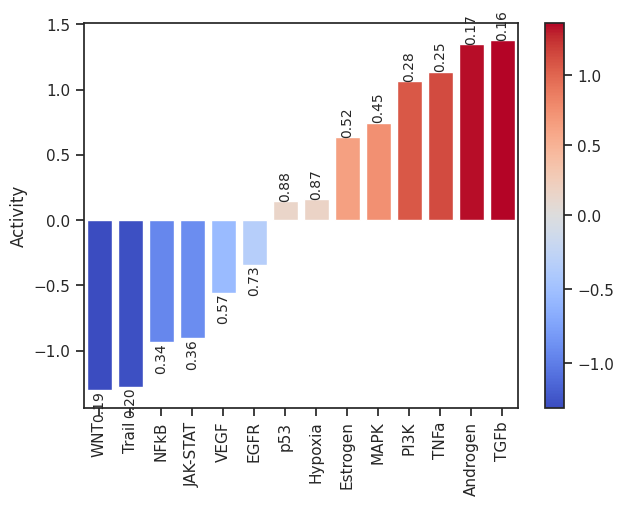

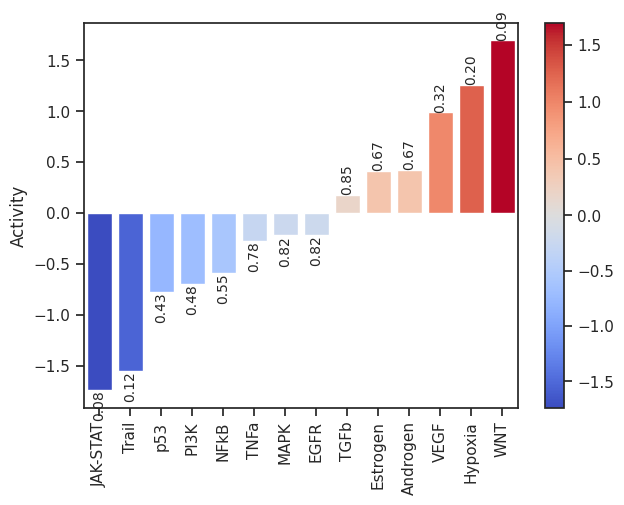

In [5]:
import seaborn as sns
sns.set(style='ticks')

mat_pre = pd.DataFrame([deseq_results['pre']["stat"]], index=['pre'])
mat_post = pd.DataFrame([deseq_results['post']["stat"]], index=['post'])


pathway_acts, pathway_pvals = decoupler.run_consensus(mat=mat_pre, net=progeny, verbose=True)
decoupler.plot_barplot(pathway_acts, 'pre', top=50, vertical=False)

print(pathway_acts)

for i, (pathway, act) in enumerate(pathway_acts.T.sort_values('pre').iterrows()):
    plt.text(x=i, 
             y=act,
             s=str(pathway_pvals[pathway][0])[:4], 
             rotation="vertical",
             ha="center",
             va="bottom" if act[0] > 0 else "top",
             weight=500,
       fontsize=10)


pathway_acts, pathway_pvals = decoupler.run_consensus(mat=mat_post, net=progeny, verbose=True)
decoupler.plot_barplot(pathway_acts, 'post', top=50, vertical=False)

for i, (pathway, act) in enumerate(pathway_acts.T.sort_values('post').iterrows()):
    plt.text(x=i, 
             y=act,
             s=str(pathway_pvals[pathway][0])[:4], 
             rotation="vertical",
             ha="center",
             va="bottom" if act[0] > 0 else "top",
             weight=500,
       fontsize=10)


## Progeny on logTPM's

In [6]:
ann = pd.read_csv('data/ann.csv', index_col=0).rename(columns={'treatment response': 'treatment_response'})
pre_ann = ann[(ann['time point'] == 'pre-treatment') & (ann['treatment_response'] != 'unknown')]
post_ann = ann[ann['time point'] == 'post-treatment']

log_tpms = pd.read_csv('data/log_tpms_from_fpkm_hgnc_filtered_by_ann.csv', index_col=0)
pre_log_tpms = log_tpms.loc[pre_ann.index]
post_log_tpms = log_tpms.loc[post_ann.index]

pre_log_tpms.shape

(25, 19388)

In [7]:
progeny = decoupler.get_progeny(top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


In [9]:
from src.scaling import median_scaling
from src.plots import plot_correlations
import seaborn as sns

def process(kind='pre'):
    if kind == 'pre':
        log_tpm = pre_log_tpms
    else:
        log_tpm = post_log_tpms
    
    pathway_acts, pathway_pvals = decoupler.run_consensus(mat=log_tpm, net=progeny, verbose=True)
    print(pathway_acts.shape, pathway_pvals.shape)
    pathway_pvals = pathway_pvals.rename(columns={col: 'p_' + col for col in pathway_pvals})
    pathway_acts = pathway_acts.rename(columns={col: 'a_' + col for col in pathway_acts})
    pathways = pathway_acts.merge(pathway_pvals, left_index=True, right_index=True)
    ssgsea_df = pd.read_csv(f'data/{kind}_ssgsea_expr_ann.csv', index_col=0)
    df = ssgsea_df.merge(pathways, left_index=True, right_index=True)
    
    cols = ['a_MAPK', 'a_PI3K'] + ['emt_bg_med', 'emt_budinska_med'] + ['MET']
    corr = df[cols].corr()
    plt.figure(figsize=(8, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
    plt.title(f'Correlations on {kind}-treatment samples')

336 features of mat are empty, they will be removed.
Running consensus.
Running mlm on mat with 25 samples and 19052 targets for 14 sources.
Running ulm on mat with 25 samples and 19052 targets for 14 sources.
Running wsum on mat with 25 samples and 19052 targets for 14 sources.
(25, 14) (25, 14)


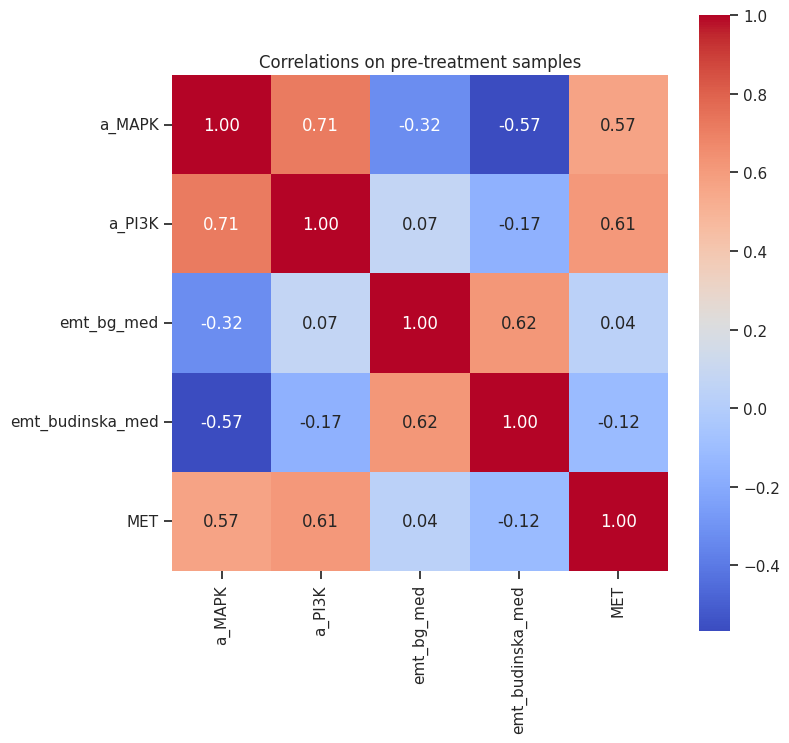

In [10]:
process('pre')

772 features of mat are empty, they will be removed.
Running consensus.
Running mlm on mat with 13 samples and 18616 targets for 14 sources.
Running ulm on mat with 13 samples and 18616 targets for 14 sources.
Running wsum on mat with 13 samples and 18616 targets for 14 sources.
(13, 14) (13, 14)


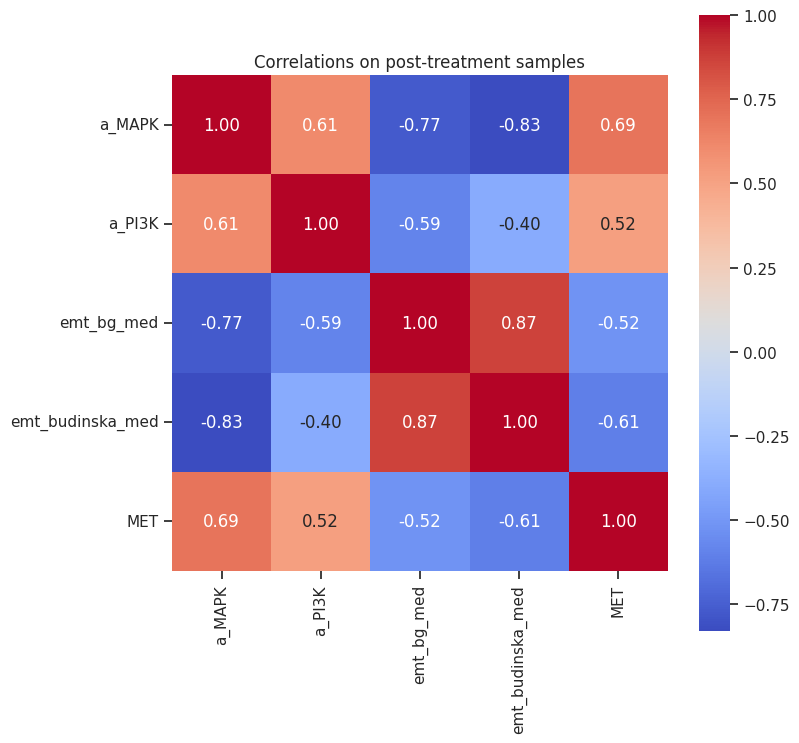

In [11]:
process('post')